# Hadoop

Let's see what influence other workloads have on Hadoop.

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

## Hadoop 10x20min

In [3]:
experiment_name = 'hadoop_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606727781,52639.0,0,inf,1751.5,1.514173e+10,1.0
1,1606727890,51743.0,0,inf,2094.0,1.573442e+10,1.0
2,1606727998,51766.0,0,inf,1423.0,1.538033e+10,1.0
3,1606728108,51581.0,0,inf,1556.0,1.544899e+10,1.0
4,1606728218,52580.0,0,inf,1836.0,1.544343e+10,1.0


### `app_latency` ~ `instances_n`

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     211.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.17e-31
Time:                        13:47:16   Log-Likelihood:                -1567.3
No. Observations:                 163   AIC:                             3139.
Df Residuals:                     161   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      5.2e+04    608.683     85.423      

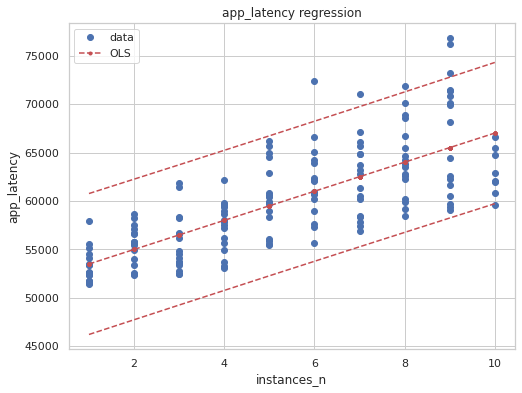

In [4]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Hadoop 1x20min, Linpack 11x20min

In [5]:
experiment_name = 'hadoop_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606877211,51846.0,0.0,inf,2316.0,1.534518e+10,1.0
1,1606877320,51451.0,0.0,inf,1796.0,1.563947e+10,1.0
2,1606877430,51373.0,0.0,inf,1861.0,1.542389e+10,1.0
3,1606877539,51807.0,0.0,inf,1822.0,1.540135e+10,1.0
4,1606877648,51376.0,0.0,inf,2091.0,1.602753e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     879.1
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           5.37e-54
Time:                        13:47:31   Log-Likelihood:                -1049.0
No. Observations:                 111   AIC:                             2102.
Df Residuals:                     109   BIC:                             2107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.754e+04    590.403     80.517      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


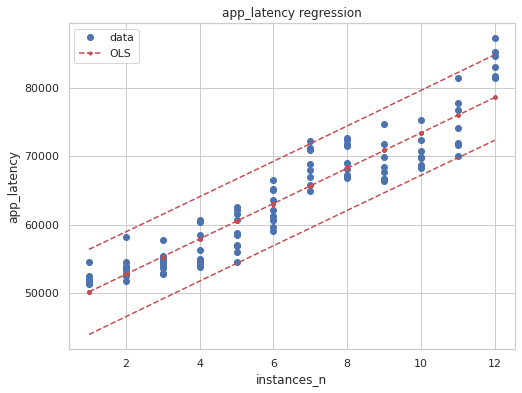

In [6]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Hadoop 1x20min, Redis YCSB 11x20min

In [8]:
experiment_name = 'hadoop_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606894918,52662.0,0.0,inf,1659.0,1.540383e+10,1.0
1,1606895029,53476.0,0.0,inf,2066.0,1.597963e+10,1.0
2,1606895139,52633.0,0.0,inf,1552.5,1.547561e+10,1.0
3,1606895248,51573.0,0.0,inf,1406.0,1.570818e+10,1.0
4,1606895357,51537.0,0.0,inf,1972.0,1.575746e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     168.6
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           9.53e-26
Time:                        13:47:52   Log-Likelihood:                -1276.0
No. Observations:                 141   AIC:                             2556.
Df Residuals:                     139   BIC:                             2562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.08e+04    363.254    139.840      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


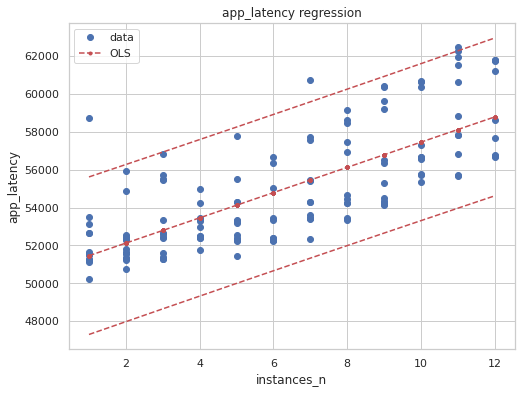

In [9]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Hadoop 1x20min, Sysbench 11x20min

In [10]:
experiment_name = 'hadoop_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606913732,52360.0,0.0,inf,1929.0,1.556743e+10,1.0
1,1606913846,53963.0,0.0,inf,1623.0,1.547045e+10,1.0
2,1606913955,51418.0,0.0,inf,1690.5,1.554095e+10,1.0
3,1606914064,51452.0,0.0,inf,1876.0,1.570693e+10,1.0
4,1606914174,51564.0,0.0,inf,1383.0,1.569563e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.94e-19
Time:                        13:48:08   Log-Likelihood:                -1330.1
No. Observations:                 152   AIC:                             2664.
Df Residuals:                     150   BIC:                             2670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.331e+04    265.847    200.546      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


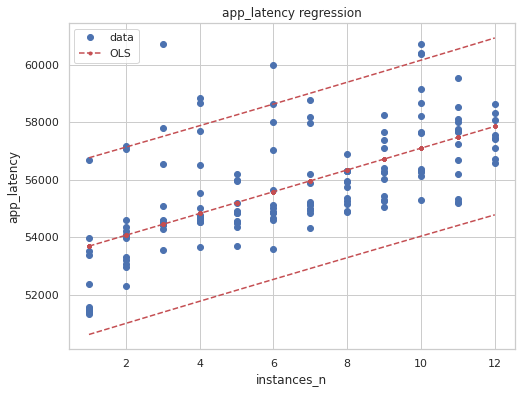

In [11]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())